# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


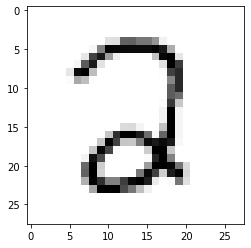

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.25271112781312777
train accuracy is: 0.5807043899182106, test accuracy is 0.5584677419354839


Epoch 10 Loss 0.0896771446381941
train accuracy is: 0.9221331997996995, test accuracy is 0.9309475806451613


Epoch 20 Loss 0.05416841677371906
train accuracy is: 0.9463361709230512, test accuracy is 0.9536290322580645


Epoch 30 Loss 0.042163163591200606
train accuracy is: 0.9544316474712068, test accuracy is 0.9632056451612904


Epoch 40 Loss 0.0362654594141001
train accuracy is: 0.9592722416958771, test accuracy is 0.9682459677419355


Epoch 50 Loss 0.03270529087395565
train accuracy is: 0.9626105825404774, test accuracy is 0.9702620967741935


Epoch 60 Loss 0.03026376715454634
train accuracy is: 0.9647805040894676, test accuracy is 0.9717741935483871


Epoch 70 Loss 0.028437542587822152
train accuracy is: 0.9676180938073777, test accuracy is 0.9722782258064516


Epoch 80 Loss 0.02698567736608215
train accuracy is: 0.9692038057085628, test accuracy is 0.9737903225806451


Epoch 90 Loss 0.02579740814997271
train accuracy is: 0.970956434651978, test accuracy is 0.9732862903225806


Epoch 100 Loss 0.024773368084907415
train accuracy is: 0.972291770989818, test accuracy is 0.9727822580645161


Epoch 110 Loss 0.023881767665138193
train accuracy is: 0.9732932732431981, test accuracy is 0.9717741935483871


Epoch 120 Loss 0.02309018239607613
train accuracy is: 0.9744616925388082, test accuracy is 0.9732862903225806


Epoch 130 Loss 0.022377998768355594
train accuracy is: 0.9752128192288433, test accuracy is 0.9732862903225806


Epoch 140 Loss 0.021722072191233118
train accuracy is: 0.9761308629611083, test accuracy is 0.9737903225806451


Epoch 150 Loss 0.0211221047042177
train accuracy is: 0.9771323652144884, test accuracy is 0.9753024193548387


Epoch 160 Loss 0.02055441032987429
train accuracy is: 0.9775496578200634, test accuracy is 0.9753024193548387


Epoch 170 Loss 0.02003558803603609
train accuracy is: 0.9779669504256384, test accuracy is 0.9747983870967742


Epoch 180 Loss 0.019539938875636487
train accuracy is: 0.9783007845100985, test accuracy is 0.9747983870967742


Epoch 190 Loss 0.019070992623118455
train accuracy is: 0.9787180771156735, test accuracy is 0.9747983870967742


Epoch 200 Loss 0.018612769442991336
train accuracy is: 0.9792188282423635, test accuracy is 0.9753024193548387


Epoch 210 Loss 0.018189467443153463
train accuracy is: 0.9797195793690536, test accuracy is 0.9758064516129032


Epoch 220 Loss 0.01778015773452482
train accuracy is: 0.9801368719746286, test accuracy is 0.9763104838709677


Epoch 230 Loss 0.01738416422042318
train accuracy is: 0.9808045401435487, test accuracy is 0.9768145161290323


Epoch 240 Loss 0.01700546391380166
train accuracy is: 0.9811383742280086, test accuracy is 0.9773185483870968


0.01422446269685589

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.23416916344412236
train accuracy is: 0.7277583041228509, test accuracy is 0.7313508064516129


Epoch 10 Loss 0.10045729216541002
train accuracy is: 0.915039225504924, test accuracy is 0.9254032258064516


Epoch 20 Loss 0.07778592746492421
train accuracy is: 0.928726422967785, test accuracy is 0.9410282258064516


Epoch 30 Loss 0.06733947425809884
train accuracy is: 0.9364046069103655, test accuracy is 0.9480846774193549


Epoch 40 Loss 0.06101600742117693
train accuracy is: 0.9414121181772659, test accuracy is 0.9511088709677419


Epoch 50 Loss 0.05668012855252874
train accuracy is: 0.9450842931063261, test accuracy is 0.9576612903225806


Epoch 60 Loss 0.053476926026615454
train accuracy is: 0.9462527124019362, test accuracy is 0.9596774193548387


Epoch 70 Loss 0.0509942673527977
train accuracy is: 0.9482557169086964, test accuracy is 0.9611895161290323


Epoch 80 Loss 0.04899651398371225
train accuracy is: 0.9500918043732265, test accuracy is 0.9637096774193549


Epoch 90 Loss 0.04734686883497582
train accuracy is: 0.9516775162744117, test accuracy is 0.9642137096774194


Epoch 100 Loss 0.045954439991990094
train accuracy is: 0.9529293940911367, test accuracy is 0.9652217741935484


Epoch 110 Loss 0.0447585145950391
train accuracy is: 0.9540978133867468, test accuracy is 0.9657258064516129


Epoch 120 Loss 0.043717914383055834
train accuracy is: 0.9556835252879319, test accuracy is 0.9662298387096774


Epoch 130 Loss 0.042798911832137805
train accuracy is: 0.956100817893507, test accuracy is 0.9667338709677419


Epoch 140 Loss 0.04198235709904718
train accuracy is: 0.957102320146887, test accuracy is 0.9667338709677419


Epoch 150 Loss 0.04124906501638386
train accuracy is: 0.957519612752462, test accuracy is 0.9667338709677419


Epoch 160 Loss 0.04058543135339334
train accuracy is: 0.957519612752462, test accuracy is 0.9667338709677419


Epoch 170 Loss 0.03998123629529974
train accuracy is: 0.9581872809213821, test accuracy is 0.967741935483871


Epoch 180 Loss 0.03942794439822804
train accuracy is: 0.9585211150058421, test accuracy is 0.967741935483871


Epoch 190 Loss 0.03891852203800462
train accuracy is: 0.9589384076114171, test accuracy is 0.967741935483871


Epoch 200 Loss 0.03844759462091973
train accuracy is: 0.9589384076114171, test accuracy is 0.967741935483871


Epoch 210 Loss 0.03800993722173615
train accuracy is: 0.9590218661325322, test accuracy is 0.967741935483871


Epoch 220 Loss 0.0376025774963713
train accuracy is: 0.9592722416958771, test accuracy is 0.967741935483871


Epoch 230 Loss 0.03722083139557401
train accuracy is: 0.9593557002169921, test accuracy is 0.967741935483871


Epoch 240 Loss 0.03686366164833651
train accuracy is: 0.9599399098647972, test accuracy is 0.967741935483871


0.03967730149507662

### Comparing results of NN and LR

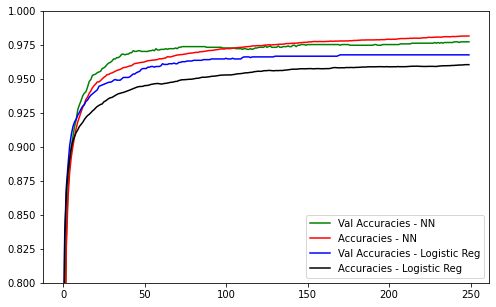

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

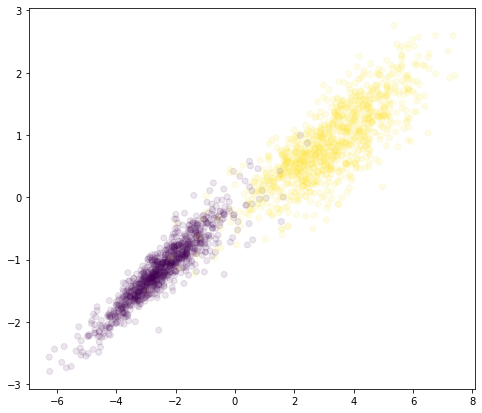

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

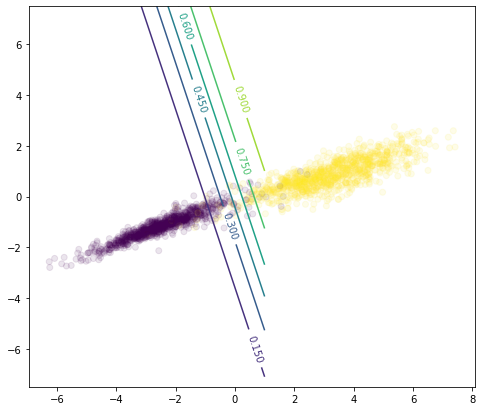

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );